## Typical Workflow

1. Getting Data Ready
2. Build or pick a pretrained model, pick a loss and optimizer, build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

Matplotlib is building the font cache; this may take a moment.


'2.6.0'

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [5]:
def plot_prediction(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, color='blue', s=4, label='Training Data')
    plt.scatter(test_data, test_labels, color='green', s=4, label='Test Data')

    if predictions is not None:
        plt.scatter(test_data, predictions, color='red', s=4, label='Predictions')

    plt.legend(prop={'size': 14})

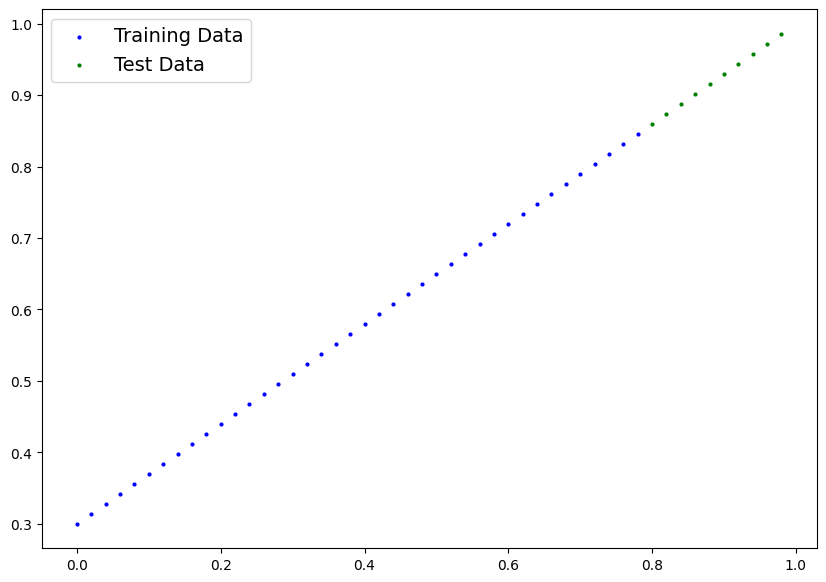

In [6]:
plot_prediction(X_train, y_train, X_test, y_test)

Note: Now's a good time to introduce you to the data explorer's motto... "visualize, visualize, visualize!"

Think of this whenever you're working with data and turning it into numbers, if you can visualize something, it can do wonders for understanding.

Machines love numbers and we humans like numbers too but we also like to look at things.

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))

    def forward(self, x) -> torch.Tensor:
        return self.weights * x + self.bias

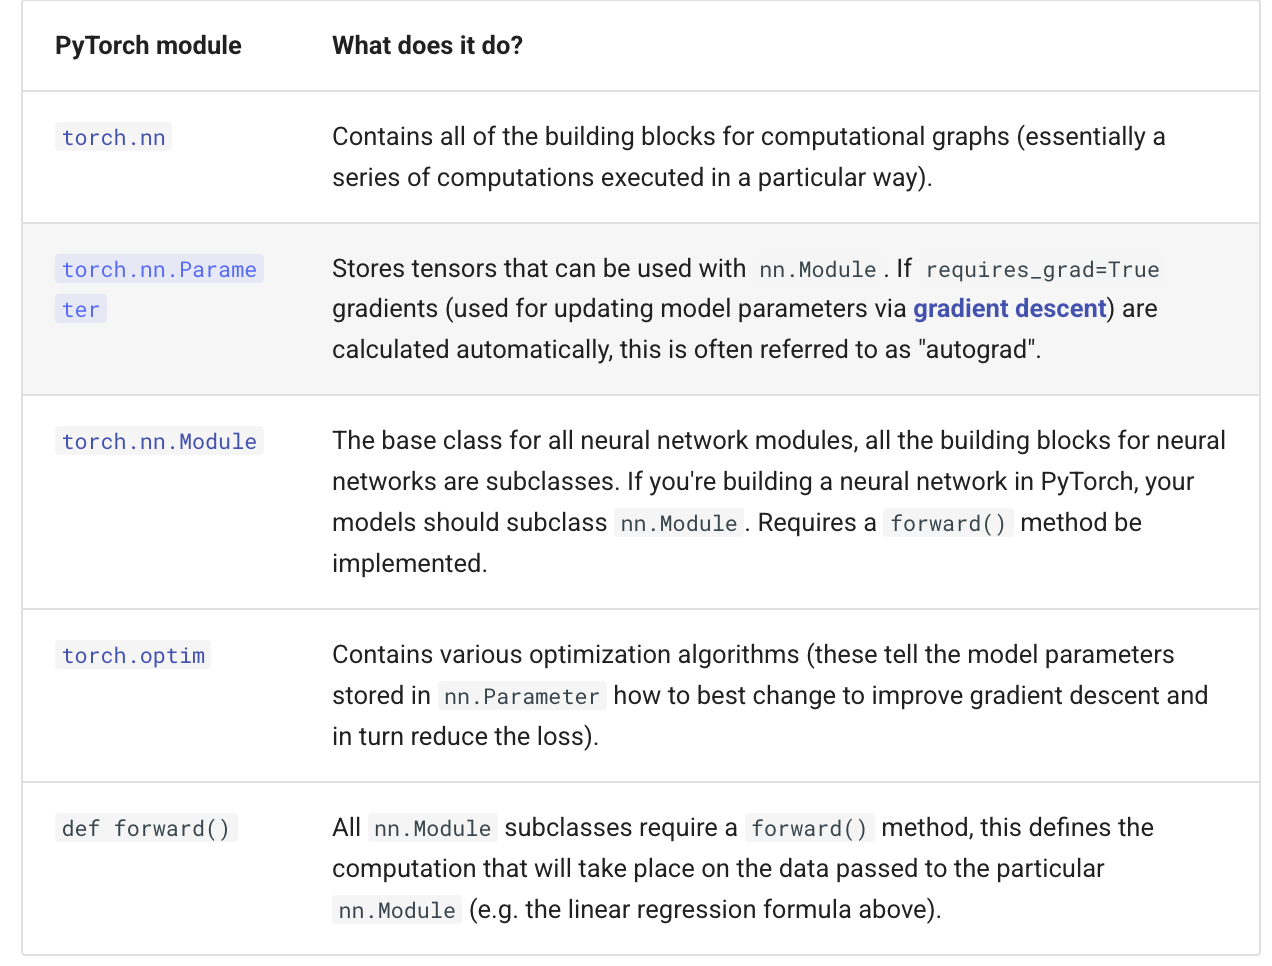

In [10]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
with torch.inference_mode():
    y_preds = model_0.forward(X_test)

In [13]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


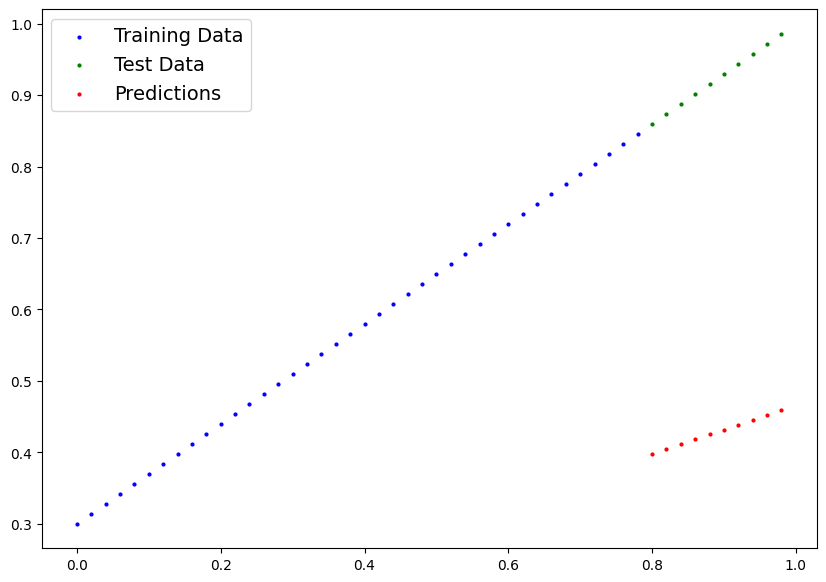

In [14]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

In [15]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [16]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [17]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model_0.train()

    y_pred = model_0.forward(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0.forward(X_test)
        test_loss = loss_fn(test_pred, y_test)

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288135051727295 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713389158249 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.2172965705394745 
Epoch: 30 | MAE Train Loss: 0.053148530423641205 | MAE Test Loss: 0.14464019238948822 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953748226166 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633813381195 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937722325325 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.027887403964996338 | MAE Test Loss: 0.06473556160926819 


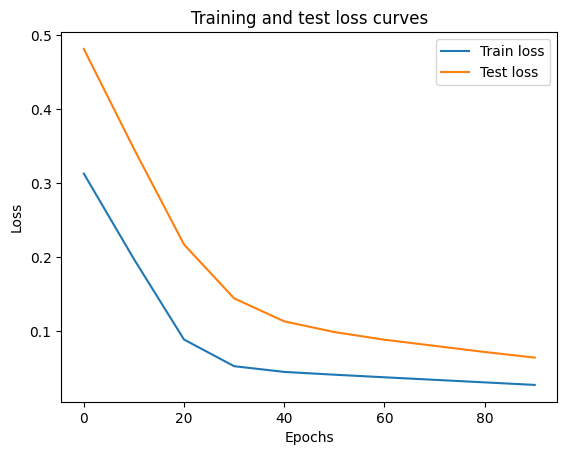

In [18]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.5784]), 'bias': tensor([0.3513])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [20]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

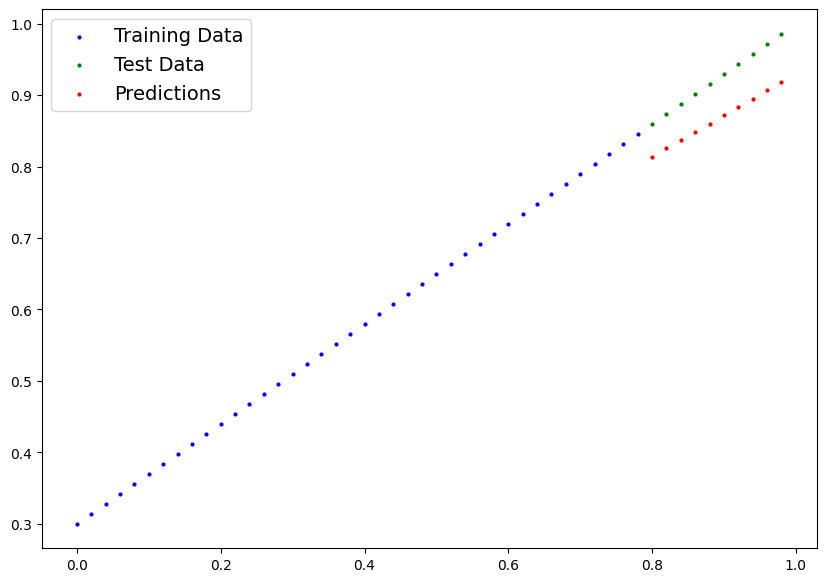

In [21]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

## Saving and Loading a model

3 main methods

1. torch.save -> saves a serialized object to disk eg, model, tensor, python dict, uses python pickle
2. torch.load -> deserialize and load pickled object files into memory.
3. torch.nn.Module.load_state_dict -> Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

Pickle module is not secure, only pickle model which are trustworthy, same for loading models

In [23]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [24]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--@ 1 nileshgupta  staff  1680 Mar 14 23:00 models/01_pytorch_workflow_model_0.pth


We only save model weights and not the full model structure
The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...



In [25]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0.forward(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [27]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x) -> torch.Tensor:
        return self.linear(x)

In [28]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.7645]])),
              ('linear.bias', tensor([0.8300]))]))

In [29]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'mps'

In [34]:
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

In [35]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [36]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1.forward(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1.forward(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.5551779270172119 | MAE Test Loss: 0.5739762783050537 
Epoch: 100 | MAE Train Loss: 0.006215682718902826 | MAE Test Loss: 0.014086711220443249 
Epoch: 200 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 300 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 400 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 500 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 600 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 700 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 800 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 
Epoch: 900 | MAE Train Loss: 0.0012645088136196136 | MAE Test Loss: 0.013801807537674904 


In [37]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear.weight', tensor([[0.6968]], device='mps:0')),
             ('linear.bias', tensor([0.3025], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


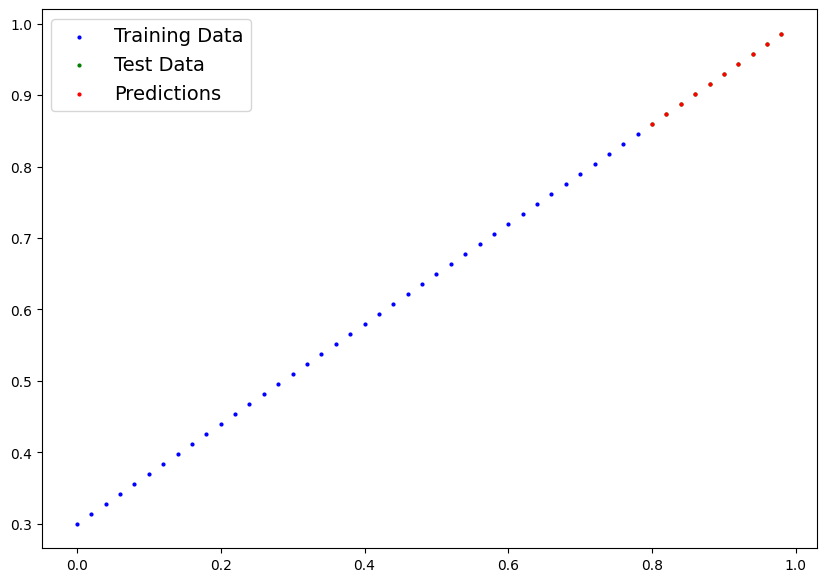

In [39]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1.forward(X_test)

plot_prediction(X_train.to('cpu'), y_train.to('cpu'), X_test.to('cpu'), y_test.to('cpu'), y_preds.to('cpu'))

In [40]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1_1.pth


In [41]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
mps:0


In [43]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1.forward(X_test)

print((y_preds == loaded_model_preds).to("cpu"))

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])
